In [331]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

# Question - 1

Write a python program which searches all the product under a particular product from www.amazon.in. The 
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for 
guitars.  

In [332]:
driver1 = webdriver.Chrome()

In [333]:
driver1.get('https://www.amazon.in./')

In [334]:
Input = driver1.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
Input.send_keys('guiter')

In [335]:
search = driver1.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div')
search.click()

# Question - 2

In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [336]:
Brand_name = []
Product_name = []
Price = []
Return_Exchange = []
Expected_delivery = []
Availability = []
Product_URL = []

In [342]:
start = 0
end = 3


for page in range(start, end):
    
    names = driver1.find_elements(By.XPATH, '//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-4"]')
    for i in names:
        Brand_name.append(i.text if i.text else "-")

    price_amount = driver1.find_elements(By.XPATH, '//span[@class="a-price-whole"]')
    for i in price_amount:
        Price.append(i.text if i.text else "-")

    delivery = driver1.find_elements(By.XPATH, '//span[@class="a-color-base a-text-bold"]')
    for i in delivery:
        Expected_delivery.append(i.text if i.text else "-")

    available = driver1.find_elements(By.XPATH, '//div[@class="a-section a-spacing-none a-spacing-top-micro"]/div[2]')
    for i in available:
        Availability.append(i.text if i.text else "-")

    urls = driver1.find_elements(By.XPATH, '//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in urls:
        product_url = i.get_attribute('href')
        Product_URL.append(product_url if product_url else "-")

    
    next_button = driver1.find_element(By.XPATH, "/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[68]/div/div/span/span[4]")
    next_button.click()

In [343]:
Brand_name_1 = [item.split()[0] for item in Brand_name]

In [344]:
new_Brand_name_1 = Brand_name_1[:180]
new_Brand_name = Brand_name[:180]
new_price = Price[:180]
new_Expected_delivery = Expected_delivery[:180]
new_Availability = Availability[:180]
new_Product_URL = Product_URL[:180]

In [345]:
import pandas as pd

In [346]:
df = pd.DataFrame({'Brand name': new_Brand_name_1 , 'Product name':new_Brand_name , 'Price': new_price , 'Expected delivery': new_Expected_delivery ,'Availability': new_Availability , 'Product URL': new_Product_URL})
df

,Brand name,Product name,Price,Expected delivery,Availability,Product URL
0,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","5,499","Tomorrow, 10 February",200+ bought in past month,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
1,Kadence,Kadence Frontier guitar with Online Guitar lea...,"4,999","Tomorrow, 10 February",100+ bought in past month,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
2,Enya,Enya Nova Go Carbon Fiber Acoustic Guitar 1/2 ...,"16,499","Wednesday, 21 February",100+ bought in past month,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
3,Henrix,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"3,099","Thursday, 15 February",2K+ bought in past month,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
4,Intern,"Intern INT-38C Right hand Acoustic Guitar Kit,...","1,995","Saturday, 17 February",300+ bought in past month,https://www.amazon.in./Intern-INT-38C-Acoustic...
...,...,...,...,...,...,...
175,YAMAHA,YAMAHA FS80C BLACK CONCERT CUTAWAY GUITAR,"2,348","Sunday, 18 February",50+ bought in past month,https://www.amazon.in./Blueberry-38C-Acoustic-...
176,Kadence,"Kadence Frontier Acoustic Guitar 40"" with Lear...","9,299","Thu, 15 Feb",50+ bought in past month,https://www.amazon.in./FS80C-Acoustic-Cutaway-...
177,Kadence,Kadence A281 Professional Acoustic Rosewood gu...,"8,319","Tomorrow, 10 February",Only 2 left in stock.,https://www.amazon.in./YAMAHA-FS80C-CONCERT-CU...
178,Medellin,Medellin Acoustic Guitar (with guitar learning...,"3,999","Tomorrow, 10 February",Only 2 left in stock.,https://www.amazon.in./Kadence-Frontier-Acoust...


In [347]:
filename = "Guiter_dataset.csv"

# Use the `to_csv` method to export the DataFrame
df.to_csv(filename, index=False)

print(f"DataFrame successfully exported to: {filename}")

DataFrame successfully exported to: Guiter_dataset.csv


# Question - 3

Write a python program to access the search bar and search button on images.google.com and scrape 10 
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [16]:
driver3 = webdriver.Chrome()

In [17]:
driver3.get('https://images.google.com/')

In [18]:
Input1 = driver3.find_element(By.CLASS_NAME,"gLFyf")
Input1.send_keys('fruits')

In [21]:
search1 = driver3.find_element(By.CLASS_NAME,"Tg7LZd")
search1.click()

In [29]:
image = driver3.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
image[0:10]
    

[<selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="E887E9EB7632463DA9E94DFACAB02D9B_element_103")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="E887E9EB7632463DA9E94DFACAB02D9B_element_386")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="E887E9EB7632463DA9E94DFACAB02D9B_element_392")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="E887E9EB7632463DA9E94DFACAB02D9B_element_393")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="E887E9EB7632463DA9E94DFACAB02D9B_element_394")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="E887E9EB7632463DA9E94DFACAB02D9B_element_395")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3












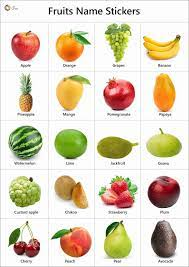
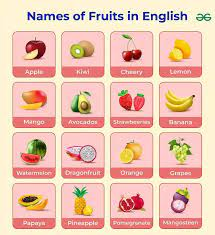
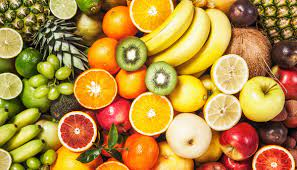
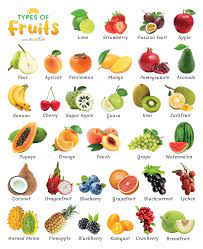
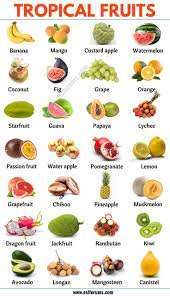
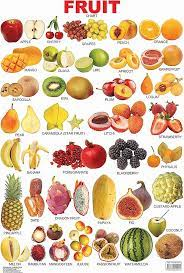
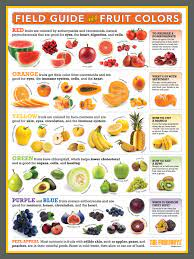
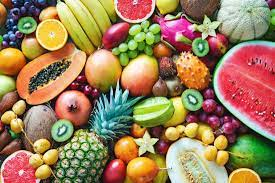
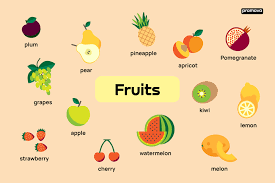
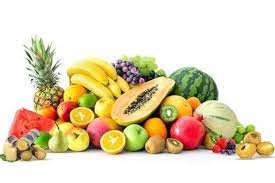

In [31]:
for i in image[0:10] :
    print(i.get_attribute('src'))

In [33]:
Input2 = driver3.find_element(By.CLASS_NAME,"gLFyf")
Input2.send_keys('cars')

In [34]:
search1 = driver3.find_element(By.CLASS_NAME,"Tg7LZd")
search1.click()

In [36]:
image = driver3.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
image[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="01F26DCB3136622590DFD03BDDE99230_element_557")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="01F26DCB3136622590DFD03BDDE99230_element_559")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="01F26DCB3136622590DFD03BDDE99230_element_561")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="01F26DCB3136622590DFD03BDDE99230_element_563")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="01F26DCB3136622590DFD03BDDE99230_element_564")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="01F26DCB3136622590DFD03BDDE99230_element_565")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3












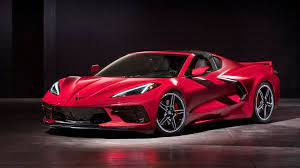
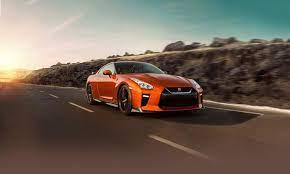
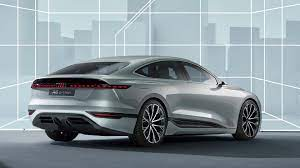
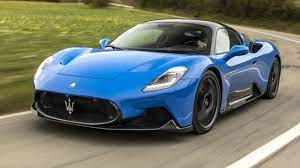
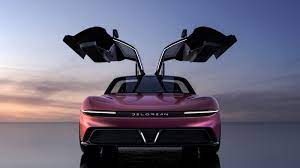
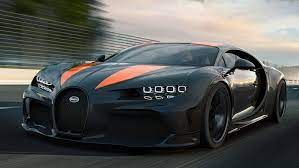
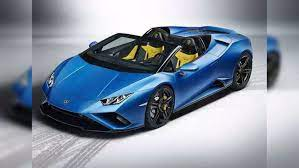
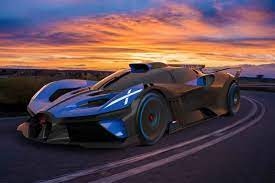
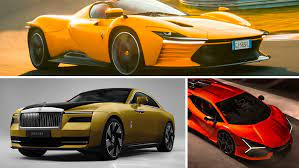
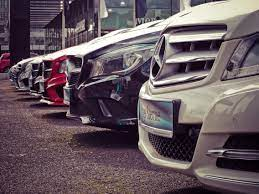

In [37]:
for i in image[0:10] :
    print(i.get_attribute('src'))

In [39]:
Input3 = driver3.find_element(By.CLASS_NAME,"gLFyf")
Input3.send_keys('Machine Learning')

In [40]:
search1 = driver3.find_element(By.CLASS_NAME,"Tg7LZd")
search1.click()

In [41]:
image = driver3.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
image[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="9395A2A64C06F24AB210641A4A9437AA_element_994")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="9395A2A64C06F24AB210641A4A9437AA_element_995")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="9395A2A64C06F24AB210641A4A9437AA_element_984")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="9395A2A64C06F24AB210641A4A9437AA_element_996")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="9395A2A64C06F24AB210641A4A9437AA_element_985")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="9395A2A64C06F24AB210641A4A9437AA_element_997")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3












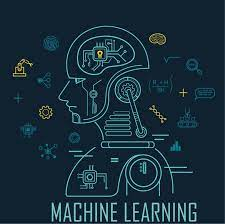
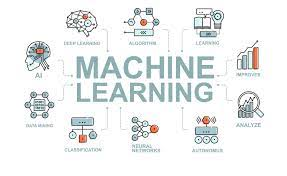
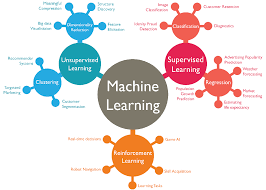
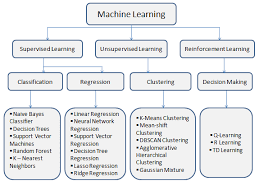
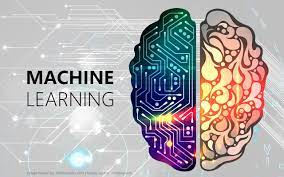
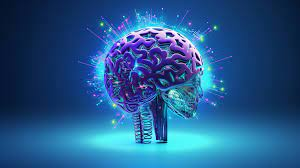
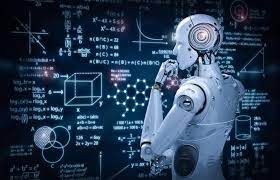
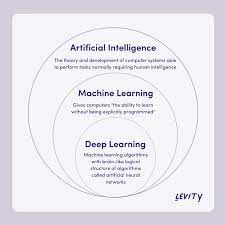
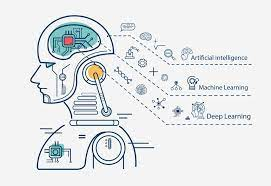
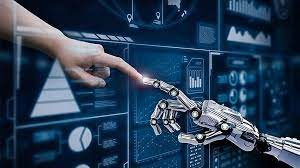

In [42]:
for i in image[0:10] :
    print(i.get_attribute('src'))

In [44]:
Input4 = driver3.find_element(By.CLASS_NAME,"gLFyf")
Input4.send_keys('Guiter')

In [45]:
search1 = driver3.find_element(By.CLASS_NAME,"Tg7LZd")
search1.click()

In [46]:
image = driver3.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
image[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="6FD182BDA1C6ABCAB81BBE8631AC50AA_element_1448")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="6FD182BDA1C6ABCAB81BBE8631AC50AA_element_1464")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="6FD182BDA1C6ABCAB81BBE8631AC50AA_element_1466")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="6FD182BDA1C6ABCAB81BBE8631AC50AA_element_1449")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="6FD182BDA1C6ABCAB81BBE8631AC50AA_element_1450")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="6FD182BDA1C6ABCAB81BBE8631AC50AA_element_1451")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f035












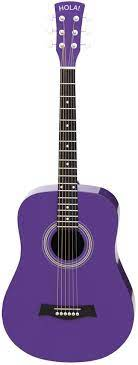
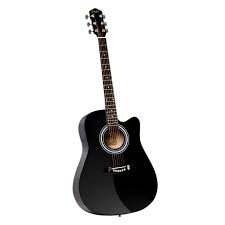
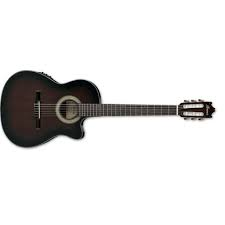
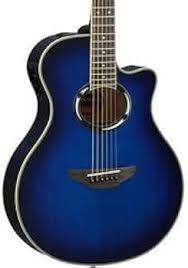
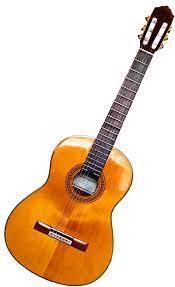
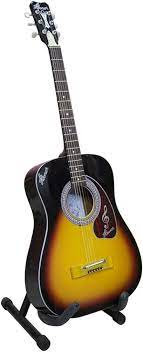
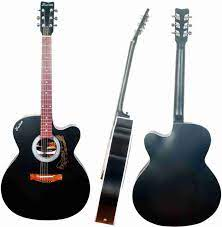
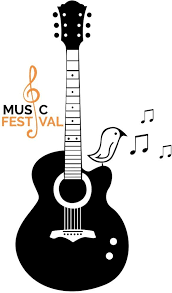
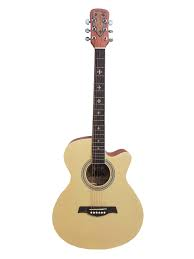
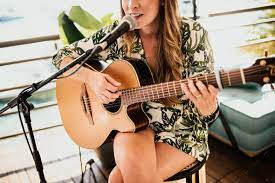

In [47]:
for i in image[0:10] :
    print(i.get_attribute('src'))

In [49]:
Input5 = driver3.find_element(By.CLASS_NAME,"gLFyf")
Input5.send_keys('Cakes')

In [50]:
search1 = driver3.find_element(By.CLASS_NAME,"Tg7LZd")
search1.click()

In [51]:
image = driver3.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
image[0:10]

[<selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="DB5D7DCB2096E839E939CAD43A3D71EC_element_1945")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="DB5D7DCB2096E839E939CAD43A3D71EC_element_1935")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="DB5D7DCB2096E839E939CAD43A3D71EC_element_1947")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="DB5D7DCB2096E839E939CAD43A3D71EC_element_1948")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="DB5D7DCB2096E839E939CAD43A3D71EC_element_1936")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f0351027f3d6a117c940", element="DB5D7DCB2096E839E939CAD43A3D71EC_element_1949")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1f7dd10e7145f035












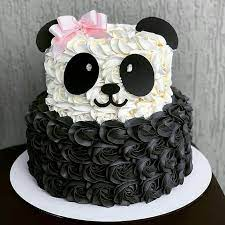
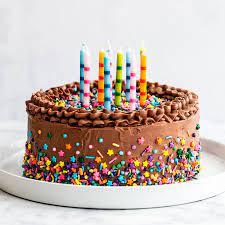
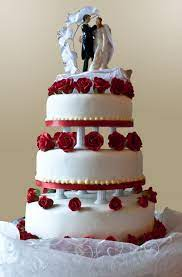
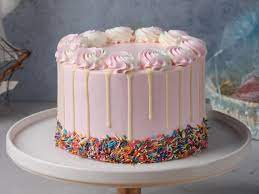
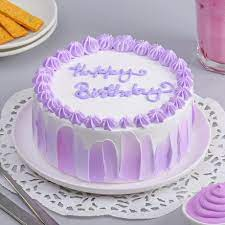
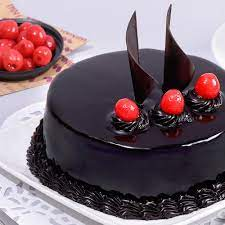
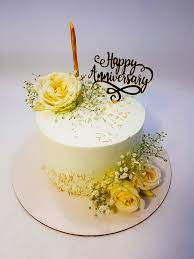
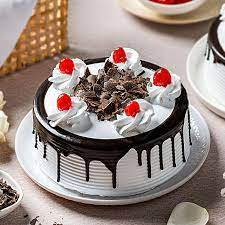
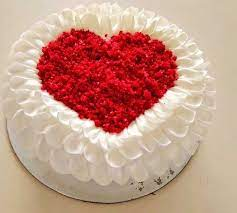
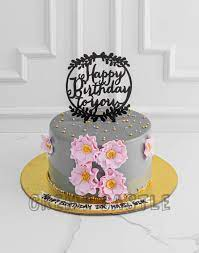

In [52]:
for i in image[0:10] :
    print(i.get_attribute('src'))

# Question - 4

Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand 
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [78]:
driver4 = webdriver.Chrome()

In [79]:
driver4.get('https://www.flipkart.com/')

In [80]:
Input =  driver4.find_element(By.CLASS_NAME,"Pke_EE")
Input.send_keys('Oneplus Nord')

In [81]:
search = driver4.find_element(By.CLASS_NAME,"_2iLD__")
search.click()

In [82]:
Name = []

In [83]:
names = driver4.find_elements(By.CLASS_NAME,"_4rR01T")
for i in names :
    Name.append(i.text)

In [84]:
Name

['OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)',
 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)',
 'OnePlus Nord CE 3 Lite 5G (Pastel lime, 256 GB)',
 'OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)',
 'OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)',
 'OnePlus Nord CE3 5G (Aqua Surge, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)',
 'OnePlus Nord 3 5G (Misty Green, 128 GB)',
 'OnePlus Nord CE3 5G (Grey Shimmer, 128 GB)',
 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)',
 'OnePlus Nord 3 5G (Tempest Gray, 256 GB)',
 'OnePlus Nord 3 5G (Tempest Gray, 128 GB)',
 'OnePlus Nord 3 5G (Misty Green, 256 GB)',
 'OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)',
 'OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)',
 'OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)',
 'One

In [92]:
Brand_names = []
Product_names = []
Colour = []

for name in Name:
    
    parts = name.split(" ")
    brand = parts[0]
    product_name = " ".join(parts[1:5])
    colour = parts[-4:-2]

    
    Brand_names.append(brand)
    Product_names.append(product_name)
    Colour.append(colour)

In [97]:
Brand_names

['OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus',
 'OnePlus']

In [134]:
print(len(Brand_names))

24


In [94]:
Product_names

['Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 2 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 2 Lite',
 'Nord CE3 5G (Aqua',
 'Nord CE 3 Lite',
 'Nord 3 5G (Misty',
 'Nord CE3 5G (Grey',
 'Nord CE 3 Lite',
 'Nord 3 5G (Tempest',
 'Nord 3 5G (Tempest',
 'Nord 3 5G (Misty',
 'Nord CE 2 5G',
 'Nord CE 2 5G',
 'Nord CE 2 5G',
 'Nord 2T 5G (Gray',
 'Nord CE 5G (Blue',
 'Nord 2T 5G (Jade',
 'Nord 2T 5G (Jade']

In [95]:
modified_list = []

for item in Product_names:
     open_paren_index = item.find("(")
    
    
    if open_paren_index == -1:
        modified_list.append(item)
    else:
        modified_item = item[:open_paren_index].rstrip()
        modified_list.append(modified_item)

In [96]:
modified_list

['Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 2 Lite',
 'Nord CE 3 Lite',
 'Nord CE 3 Lite',
 'Nord CE 2 Lite',
 'Nord CE3 5G',
 'Nord CE 3 Lite',
 'Nord 3 5G',
 'Nord CE3 5G',
 'Nord CE 3 Lite',
 'Nord 3 5G',
 'Nord 3 5G',
 'Nord 3 5G',
 'Nord CE 2 5G',
 'Nord CE 2 5G',
 'Nord CE 2 5G',
 'Nord 2T 5G',
 'Nord CE 5G',
 'Nord 2T 5G',
 'Nord 2T 5G']

In [133]:
print(len(modified_list))

24


In [98]:
Colour

[['(Pastel', 'Lime,'],
 ['(Pastel', 'Lime,'],
 ['(Chromatic', 'Gray,'],
 ['(Chromatic', 'Gray,'],
 ['(Pastel', 'lime,'],
 ['(Blue', 'Tide,'],
 ['(Chromatic', 'Gray,'],
 ['(Chromatic', 'Gray,'],
 ['(Black', 'Dusk,'],
 ['(Aqua', 'Surge,'],
 ['(Pastel', 'Lime,'],
 ['(Misty', 'Green,'],
 ['(Grey', 'Shimmer,'],
 ['(Chromatic', 'Gray,'],
 ['(Tempest', 'Gray,'],
 ['(Tempest', 'Gray,'],
 ['(Misty', 'Green,'],
 ['(Bahama', 'Blue,'],
 ['(Bahama', 'Blue,'],
 ['(Bahama', 'Blue,'],
 ['(Gray', 'Shadow,'],
 ['(Blue', 'Void,'],
 ['(Jade', 'Fog,'],
 ['(Jade', 'Fog,']]

In [99]:
modified_list2 = []

for item in Colour:
    modified_item = item[0].strip("()") + " " + item[1].strip(",")
    modified_list2.append(modified_item)

In [100]:
modified_list2

['Pastel Lime',
 'Pastel Lime',
 'Chromatic Gray',
 'Chromatic Gray',
 'Pastel lime',
 'Blue Tide',
 'Chromatic Gray',
 'Chromatic Gray',
 'Black Dusk',
 'Aqua Surge',
 'Pastel Lime',
 'Misty Green',
 'Grey Shimmer',
 'Chromatic Gray',
 'Tempest Gray',
 'Tempest Gray',
 'Misty Green',
 'Bahama Blue',
 'Bahama Blue',
 'Bahama Blue',
 'Gray Shadow',
 'Blue Void',
 'Jade Fog',
 'Jade Fog']

In [132]:
print(len(modified_list2))

24


In [103]:
Ram = []

value = driver4.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[1]')
for i in value :
    Ram.append(i.text)

In [104]:
Ram

['8 GB RAM | 256 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 256 GB ROM',
 '8 GB RAM | 256 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '8 GB RAM | 256 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '6 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 256 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '16 GB RAM | 256 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '16 GB RAM | 256 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '8 GB RAM | 128 GB ROM',
 '12 GB RAM | 256 GB ROM']

In [106]:
RAM = []
ROM = []

for data in Ram:
    words = data.split()
    
    ram_data = " ".join(words[:3]).rstrip()
    RAM.append(ram_data)
    
    rom_data = " ".join(words[-3:]).rstrip()
    ROM.append(rom_data)

In [107]:
RAM

['8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '6 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '6 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '16 GB RAM',
 '8 GB RAM',
 '16 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '8 GB RAM',
 '12 GB RAM']

In [131]:
print(len(RAM))

24


In [108]:
ROM

['256 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '256 GB ROM',
 '256 GB ROM',
 '128 GB ROM',
 '256 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '256 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '256 GB ROM',
 '128 GB ROM',
 '256 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '128 GB ROM',
 '256 GB ROM']

In [130]:
print(len(ROM))

24


In [109]:
Primary_Camera = []

Primary_cameras = driver4.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[3]')
for i in Primary_cameras :
    Primary_Camera.append(i.text)

In [110]:
Primary_Camera

['108MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '64MP Rear Camera | 16MP Front Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '64MP Rear Camera | 16MP Front Camera',
 '50MP Rear Camera | 50MP Front Camera',
 '108MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '108MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera | 32MP Front Camera',
 '50MP Rear Camera']

In [114]:
modified_list3 = []

for data in Primary_Camera :
    modified_data = " ".join(data.split()[:3]).replace("|", "")
    modified_list3.append(modified_data)


In [115]:
modified_list3

['108MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '64MP Rear Camera',
 '108MP Rear Camera',
 '108MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '108MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '108MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera']

In [129]:
print(len(modified_list3))

24


In [112]:
Display_size = []

Display_sizes = driver4.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[2]')
for i in Display_sizes :
    Display_size.append(i.text)
    
Display_size

['17.07 cm (6.72 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '16.74 cm (6.59 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '17.12 cm (6.74 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '17.07 cm (6.72 inch) Display',
 '17.12 cm (6.74 inch) Display',
 '17.12 cm (6.74 inch) Full HD+ Display',
 '17.12 cm (6.74 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '16.33 cm (6.43 inch) Display',
 '17.02 cm (6.7 inch) Display',
 '17.02 cm (6.7 inch) Display']

In [128]:
print(len(Display_size))

24


In [113]:
Battery_Capacity = []

Battery = driver4.find_elements(By.XPATH,'//div[@class="fMghEO"]/ul/li[4]')
for i in Battery :
    Battery_Capacity.append(i.text)
    
Battery_Capacity

['5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery']

In [127]:
print(len(Battery_Capacity))

24


In [124]:
Price

Price_amount = driver4.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
for i in Price_amount :
    Price.append(i.text)

In [136]:
Price.insert(21, "-")

print(Price)

['₹20,972', '₹19,477', '₹19,439', '₹20,893', '₹21,280', '₹18,397', '₹21,393', '₹19,476', '₹17,836', '₹24,786', '₹21,411', '₹28,198', '₹24,389', '₹19,457', '₹36,000', '₹28,969', '₹37,630', '₹21,990', '₹22,995', '₹21,395', '₹28,999', '-', '₹28,999', '₹33,990']


In [121]:
Product_URL = []

URL = driver4.find_elements(By.XPATH ,'//a[@class="_1fQZEK"]')
for i in URL :
    Urls = i.get_attribute('href')
    Product_URL.append(Urls)
    
    

In [122]:
Product_URL

['https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-pastel-lime-256-gb/p/itm2cd5a4e659035?pid=MOBGZJ3ZFQ8AKKRS&lid=LSTMOBGZJ3ZFQ8AKKRS488YYT&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=4c672f4c-9774-436c-8593-2e7279f0ae34.MOBGZJ3ZFQ8AKKRS.SEARCH&ppt=hp&ppn=homepage&ssid=a2iqtw6t9s0000001707357392847&qH=53863d4d978d5074',
 'https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-pastel-lime-128-gb/p/itm2cd5a4e659035?pid=MOBGZJ3WM5SGTGVZ&lid=LSTMOBGZJ3WM5SGTGVZ7OYKFP&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=4c672f4c-9774-436c-8593-2e7279f0ae34.MOBGZJ3WM5SGTGVZ.SEARCH&ppt=hp&ppn=homepage&ssid=a2iqtw6t9s0000001707357392847&qH=53863d4d978d5074',
 'https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-chromatic-gray-128-gb/p/itm2cd5a4e659035?pid=MOBGZJ42KHUZZKMN&lid=LSTMOBGZJ42KHUZZKMNMOFKNU&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_3&otracker=s

In [137]:
print(len(Price))

24


In [138]:
import pandas as pd

df = pd.DataFrame({'Brand Name': Brand_names, 'Smartphone name': modified_list , 'Colour': modified_list2 , 'RAM' : RAM , 'Storage(ROM)': ROM , 'Primary Camera': modified_list3, 'Display Size': Display_size , 'Battery Capacity':Battery_Capacity , 'Price' : Price, ' “Product URL' : Product_URL })

In [139]:
df

,Brand Name,Smartphone name,Colour,RAM,Storage(ROM),Primary Camera,Display Size,Battery Capacity,Price,“Product URL
0,OnePlus,Nord CE 3 Lite,Pastel Lime,8 GB RAM,256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹20,972",https://www.flipkart.com/oneplus-nord-ce-3-lit...
1,OnePlus,Nord CE 3 Lite,Pastel Lime,8 GB RAM,128 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹19,477",https://www.flipkart.com/oneplus-nord-ce-3-lit...
2,OnePlus,Nord CE 3 Lite,Chromatic Gray,8 GB RAM,128 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹19,439",https://www.flipkart.com/oneplus-nord-ce-3-lit...
3,OnePlus,Nord CE 3 Lite,Chromatic Gray,8 GB RAM,256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹20,893",https://www.flipkart.com/oneplus-nord-ce-3-lit...
4,OnePlus,Nord CE 3 Lite,Pastel lime,8 GB RAM,256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹21,280",https://www.flipkart.com/oneplus-nord-ce-3-lit...
5,OnePlus,Nord CE 2 Lite,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹18,397",https://www.flipkart.com/oneplus-nord-ce-2-lit...
6,OnePlus,Nord CE 3 Lite,Chromatic Gray,8 GB RAM,256 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹21,393",https://www.flipkart.com/oneplus-nord-ce-3-lit...
7,OnePlus,Nord CE 3 Lite,Chromatic Gray,8 GB RAM,128 GB ROM,108MP Rear Camera,17.07 cm (6.72 inch) Display,5000 mAh Battery,"₹19,476",https://www.flipkart.com/oneplus-nord-ce-3-lit...
8,OnePlus,Nord CE 2 Lite,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,16.74 cm (6.59 inch) Display,5000 mAh Battery,"₹17,836",https://www.flipkart.com/oneplus-nord-ce-2-lit...
9,OnePlus,Nord CE3 5G,Aqua Surge,8 GB RAM,128 GB ROM,50MP Rear Camera,17.02 cm (6.7 inch) Display,5000 mAh Battery,"₹24,786",https://www.flipkart.com/oneplus-nord-ce3-5g-a...


In [140]:
filename = "smartphone_dataset.csv"

# Use the `to_csv` method to export the DataFrame
df.to_csv(filename, index=False)

print(f"DataFrame successfully exported to: {filename}")

DataFrame successfully exported to: smartphone_dataset.csv


# Question - 6

Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [186]:
driver6 = webdriver.Chrome()

In [187]:
driver6.get('https://www.digit.in/')

# Best AMD Gaming Laptops With Nvidia GeForce RTX 3050

In [188]:
Product_name = []
data_list = []

In [189]:
names = driver6.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for i in names :
    Product_name.append(i.text)
    

In [190]:
Product_name

['Lenovo IdeaPad Gaming 3 82K200X3IN Ryzen 7-5800H (2022)',
 'Dell New G15-5515 D560805WIN9W Ryzen 5-5600H (2022)',
 'HP Pavilion Gaming 15-ec2145AX Ryzen 5-5600H (2022)',
 'Lenovo IdeaPad Gaming 3 15ACH6 Ryzen 5-5600H (2021)']

In [191]:
system = driver6.find_elements(By.XPATH,'//div[@class="rh_gr_middle_desc"]')
for i in system :
    data_list.append(i.text)

In [192]:
data_list

['Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\n5th Gen AMD Ryzen 7-5800',
 'Operating System:\nWindows 10\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5-5600H',
 'Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5 5600H',
 'Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5-5600H']

In [193]:
Operating_system = []
Display_size = []
Resolution = []
Processor = []

In [194]:
for data in data_list:
    parts = data.replace("\n", " ").split()

    operating_system = parts[2:5] if "Home" in parts else parts[2:4]  
    display_size = parts[8]
    resolution = parts[10:15]
    processor = parts[-5:]

    operating_system = [part.strip(":") for part in operating_system]
    display_size = display_size.strip(":")
    resolution = [part.strip(":") for part in resolution]
    processor = [part.strip(":") for part in processor]

    Operating_system.append(", ".join(operating_system))
    Display_size.append(display_size)
    Resolution.append(" ".join(resolution))
    Processor.append(" ".join(processor))

In [195]:
print("Operating System:", Operating_system)
print("Display Size:", Display_size)
print("Resolution:", Resolution)
print("Processor:", Processor)

Operating System: ['Windows, 11, Home', 'Windows, 10', 'Windows, 11, Home', 'Windows, 11, Home']
Display Size: ['15.6', 'Resolution', '15.6', '15.6']
Resolution: [' 1920 x 1080 Processor', '1920 x 1080 Processor ', ' 1920 x 1080 Processor', ' 1920 x 1080 Processor']
Processor: ['5th Gen AMD Ryzen 7-5800', 'Processor  AMD Ryzen 5-5600H', ' AMD Ryzen 5 5600H', 'Processor  AMD Ryzen 5-5600H']


In [196]:
new_list = [item if item != 'Resolution' else 15.6 for item in Display_size]

In [197]:
new_list

['15.6', 15.6, '15.6', '15.6']

In [202]:
df = pd.DataFrame({'Laptop name': Product_name ,'Operating system': Operating_system, 'Display size' : new_list , 'Resolution ': Resolution , 'Processor' : Processor  })
df

,Laptop name,Operating system,Display size,Resolution,Processor
0,Lenovo IdeaPad Gaming 3 82K200X3IN Ryzen 7-580...,"Windows, 11, Home",15.6,1920 x 1080 Processor,5th Gen AMD Ryzen 7-5800
1,Dell New G15-5515 D560805WIN9W Ryzen 5-5600H (...,"Windows, 10",15.6,1920 x 1080 Processor,Processor AMD Ryzen 5-5600H
2,HP Pavilion Gaming 15-ec2145AX Ryzen 5-5600H (...,"Windows, 11, Home",15.6,1920 x 1080 Processor,AMD Ryzen 5 5600H
3,Lenovo IdeaPad Gaming 3 15ACH6 Ryzen 5-5600H (...,"Windows, 11, Home",15.6,1920 x 1080 Processor,Processor AMD Ryzen 5-5600H


# Best AMD Gaming Laptop With 16GB RAM

In [225]:
Product_name2 = []
data_list2 = []

In [226]:
names2 = driver6.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for i in names2 :
    Product_name2.append(i.text)

In [227]:
Product_name2

['HP OMEN 15-en1037AX 5th Gen Ryzen 7-5800H (2021)',
 'Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021)',
 'Dell New G15-5515 D560730WIN9W Ryzen 7-5800H',
 'Lenovo Ideapad Gaming 3 82K200X2IN Ryzen 7-5800H (2022)']

In [228]:
lists = driver6.find_elements(By.XPATH,'//div[@class="rh_gr_middle_desc"]')
for i in lists :
    data_list2.append(i.text)

In [229]:
data_list2

['Operating System:\nWindows 10 Home\nDisplay Size :\n15.6\nResolution :\n2560 x 1440\nProcessor :\n5th Gen AMD Ryzen 7-5800H',
 'Operating System:\nWindows 10 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5 Hexa Core 5600H',
 'Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen R7-5800H',
 'Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 7-5800H']

In [230]:
Operating_system2 = []
Display_size2 = []
Resolution2 = []
Processor2 = []

In [231]:
for data in data_list2:
    parts = data.replace("\n", " ").split()

    operating_system2 = parts[2:5]   
    display_size2 = parts[8]
    resolution2 = parts[10:15]
    processor2 = parts[-6:]

    operating_system2 = [part.strip(":") for part in operating_system2]
    display_size2 = display_size.strip(":")
    resolution2 = [part.strip(":") for part in resolution2]
    processor2 = [part.strip(":") for part in processor2]

    Operating_system2.append(", ".join(operating_system2))
    Display_size2.append(display_size2)
    Resolution2.append(" ".join(resolution2))
    Processor2.append(" ".join(processor2))

In [235]:
print("Operating System:", Operating_system2)
print("Display Size:", Display_size2)
print("Resolution:", Resolution2)
print("Processor:", Processor2)

Operating System: ['Windows, 10, Home', 'Windows, 10, Home', 'Windows, 11, Home', 'Windows, 11, Home']
Display Size: ['15.6', '15.6', '15.6', '15.6']
Resolution: [' 2560 x 1440 Processor', ' 1920 x 1080 Processor', ' 1920 x 1080 Processor', ' 1920 x 1080 Processor']
Processor: [' 5th Gen AMD Ryzen 7-5800H', 'AMD Ryzen 5 Hexa Core 5600H', '1080 Processor  AMD Ryzen R7-5800H', '1080 Processor  AMD Ryzen 7-5800H']


In [240]:
modified_list4 = []
for item in Processor2:
    if '1080 Processor' in item:
        modified_list4.append(item.replace("1080 Processor", ""))
    else:
        modified_list4.append(item)

In [241]:
modified_list4

[' 5th Gen AMD Ryzen 7-5800H',
 'AMD Ryzen 5 Hexa Core 5600H',
 '  AMD Ryzen R7-5800H',
 '  AMD Ryzen 7-5800H']

In [242]:
df2 = pd.DataFrame({'Laptop name': Product_name2 ,'Operating system': Operating_system2, 'Display size' : Display_size2 , 'Resolution ': Resolution2 , 'Processor' : modified_list4  })
df2

,Laptop name,Operating system,Display size,Resolution,Processor
0,HP OMEN 15-en1037AX 5th Gen Ryzen 7-5800H (2021),"Windows, 10, Home",15.6,2560 x 1440 Processor,5th Gen AMD Ryzen 7-5800H
1,Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021),"Windows, 10, Home",15.6,1920 x 1080 Processor,AMD Ryzen 5 Hexa Core 5600H
2,Dell New G15-5515 D560730WIN9W Ryzen 7-5800H,"Windows, 11, Home",15.6,1920 x 1080 Processor,AMD Ryzen R7-5800H
3,Lenovo Ideapad Gaming 3 82K200X2IN Ryzen 7-580...,"Windows, 11, Home",15.6,1920 x 1080 Processor,AMD Ryzen 7-5800H


# Best AMD Gaming Laptops for Students

In [243]:
Product_name3 = []
data_list3 = []

In [244]:
names3 = driver6.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for i in names3 :
    Product_name3.append(i.text)

In [245]:
Product_name3

['HP Victus 16-e0362ax 5th Gen Ryzen 7-5800H (2022)',
 'Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021)',
 'Dell New G15-5515 D560804WIN9W Ryzen 5-5600H (2022)',
 'HP Pavilion Gaming 15-EC2048AX Ryzen 5-5600X',
 'Lenovo Ideapad Gaming 3 82K201RRIN AMD Ryzen 5-5600H (2022)']

In [246]:
lists3 = driver6.find_elements(By.XPATH,'//div[@class="rh_gr_middle_desc"]')
for i in lists3 :
    data_list3.append(i.text)

In [247]:
data_list3

['Operating System:\nWindows 11 Home\nDisplay Size :\n16.1\nResolution :\n2560 x 1440\nProcessor :\n5th Gen AMD Ryzen 7-5800H',
 'Operating System:\nWindows 10 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5 Hexa Core 5600H',
 'Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5-5600H',
 'Operating System:\nWindows 10 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5-5600X',
 'Operating System:\nWindows 11 Home\nDisplay Size :\n15.6\nResolution :\n1920 x 1080\nProcessor :\nAMD Ryzen 5-5600H']

In [248]:
Operating_system3 = []
Display_size3 = []
Resolution3 = []
Processor3 = []

In [249]:
for data in data_list3:
    parts = data.replace("\n", " ").split()

    operating_system3 = parts[2:5]   
    display_size3 = parts[8]
    resolution3 = parts[10:15]
    processor3 = parts[-6:]

    operating_system3 = [part.strip(":") for part in operating_system3]
    display_size3 = display_size3.strip(":")
    resolution3 = [part.strip(":") for part in resolution3]
    processor3 = [part.strip(":") for part in processor3]
    
    Operating_system3.append(", ".join(operating_system3))
    Display_size3.append(display_size3)
    Resolution3.append(" ".join(resolution3))
    Processor3.append(" ".join(processor3))

In [250]:
print("Operating System:", Operating_system3)
print("Display Size:", Display_size3)
print("Resolution:", Resolution3)
print("Processor:", Processor3)

Operating System: ['Windows, 11, Home', 'Windows, 10, Home', 'Windows, 11, Home', 'Windows, 10, Home', 'Windows, 11, Home']
Display Size: ['16.1', '15.6', '15.6', '15.6', '15.6']
Resolution: [' 2560 x 1440 Processor', ' 1920 x 1080 Processor', ' 1920 x 1080 Processor', ' 1920 x 1080 Processor', ' 1920 x 1080 Processor']
Processor: [' 5th Gen AMD Ryzen 7-5800H', 'AMD Ryzen 5 Hexa Core 5600H', '1080 Processor  AMD Ryzen 5-5600H', '1080 Processor  AMD Ryzen 5-5600X', '1080 Processor  AMD Ryzen 5-5600H']


In [251]:
modified_list5 = []
for item in Processor3:
    if '1080 Processor' in item:
        modified_list5.append(item.replace("1080 Processor", ""))
    else:
        modified_list5.append(item)

In [252]:
modified_list5

[' 5th Gen AMD Ryzen 7-5800H',
 'AMD Ryzen 5 Hexa Core 5600H',
 '  AMD Ryzen 5-5600H',
 '  AMD Ryzen 5-5600X',
 '  AMD Ryzen 5-5600H']

In [253]:
df3 = pd.DataFrame({'Laptop name': Product_name3 ,'Operating system': Operating_system3, 'Display size' : Display_size3 , 'Resolution ': Resolution3 , 'Processor' : modified_list5  })
df3

,Laptop name,Operating system,Display size,Resolution,Processor
0,HP Victus 16-e0362ax 5th Gen Ryzen 7-5800H (2022),"Windows, 11, Home",16.1,2560 x 1440 Processor,5th Gen AMD Ryzen 7-5800H
1,Acer Nitro 5 AN515-45-R3TC Ryzen 5-5600H (2021),"Windows, 10, Home",15.6,1920 x 1080 Processor,AMD Ryzen 5 Hexa Core 5600H
2,Dell New G15-5515 D560804WIN9W Ryzen 5-5600H (...,"Windows, 11, Home",15.6,1920 x 1080 Processor,AMD Ryzen 5-5600H
3,HP Pavilion Gaming 15-EC2048AX Ryzen 5-5600X,"Windows, 10, Home",15.6,1920 x 1080 Processor,AMD Ryzen 5-5600X
4,Lenovo Ideapad Gaming 3 82K201RRIN AMD Ryzen 5...,"Windows, 11, Home",15.6,1920 x 1080 Processor,AMD Ryzen 5-5600H


# Question - 8

Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
from any YouTube Video. 

In [2]:
driver8 = webdriver.Chrome()

In [3]:
driver8.get('https://www.youtube.com/')

In [4]:
Input = driver8.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/form/div[1]/div[1]/input')
Input.send_keys('Elon musk on education system')

In [5]:
search = driver8.find_element(By.XPATH , '/html/body/ytd-app/div[1]/div/ytd-masthead/div[4]/div[2]/ytd-searchbox/button/yt-icon/yt-icon-shape/icon-shape')
search.click()

In [6]:
Video = driver8.find_element(By.XPATH, '/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a/yt-formatted-string')
Video.click()

In [39]:
comments = []
time = []

In [32]:
Cmnt = driver8.find_elements(By.XPATH,'//*[@id="content-text"]')
for i in Cmnt :
    comments.append(i.text)
    
    

In [37]:
comment = comments[1:501]

In [38]:
print(len(comment))

500


In [40]:
Tim = driver8.find_elements(By.XPATH,'//*[@id="header-author"]/yt-formatted-string/a')
for i in Tim :
    time.append(i.text)

In [43]:
new_time = time[1:501]

In [44]:
print(len(new_time))

500


In [45]:
import pandas as pd

df = pd.DataFrame({'Comments': comment , 'Time': new_time})
df

,Comments,Time
0,After 25 years of teaching I can tell you firs...,1 year ago
1,I completely agree with Elon's views about edu...,4 months ago
2,How awesome that these things can be said in t...,8 months ago
3,I taught private music lessons for 26 years. I...,8 months ago
4,I mean he is right. I am just month away from ...,9 months ago
...,...,...
495,I agree 100% on what Elon said about formal ed...,4 months ago
496,"i guess education has good side and bad side ,...",2 months ago
497,Summary on education:\n\n1. Show exceptional a...,1 month ago (edited)
498,Separation of Education and State is even more...,7 months ago


# Question - 9

Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall 
reviews, privates from price, dorms from price, facilities and property description.

In [70]:
driver9 = webdriver.Chrome()

In [71]:
driver9.get('https://www.hostelworld.com/')

In [159]:
Input = driver9.find_element(By.XPATH ,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div/div/div[2]/input')
Input.send_keys('London , England')

In [160]:
London = driver9.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button')
London.click()

In [161]:
Search = driver9.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]')
Search.click()

In [162]:
Hostel_name = []
Distance_description = []
Rating = []
Total_reviews = []
Overall_reviews = []
privates_from_price = []
Dorms_from_price = []

In [163]:
start = 0
end = 2

for pages in range(start , end):
    names = driver9.find_elements(By.XPATH,'//div[@class="property-name"]')
    for i in names:
        Hostel_name.append(i.text)
        
    descriptions = driver9.find_elements(By.XPATH,'//span[@class="distance-description"]')
    for i in descriptions:
        Distance_description.append(i.text)
        
    ratings = driver9.find_elements(By.XPATH,'//span[@class="number"]')
    for i in ratings:
        Rating.append(i.text)
        
    total_review = driver9.find_elements(By.XPATH,'//span[@class="left-margin"]')
    for i in total_review:
        Total_reviews.append(i.text)
        
    overall_review = driver9.find_elements(By.XPATH,'//span[@class="keyword"]')
    for i in overall_review:
        Overall_reviews.append(i.text)
        
    privet_price = driver9.find_elements(By.XPATH,'//strong[@class="current"]')
    for i in privet_price:
        privates_from_price.append(i.text)
        
    next_button =  driver9.find_element(By.XPATH ,"/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/div[2]/button")
    next_button.click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/div[2]/button"}
  (Session info: chrome=121.0.6167.161); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF628875E42+3538674]
	(No symbol) [0x00007FF628494C02]
	(No symbol) [0x00007FF628345AEB]
	(No symbol) [0x00007FF62838BF4E]
	(No symbol) [0x00007FF62838C0CC]
	(No symbol) [0x00007FF6283CE477]
	(No symbol) [0x00007FF6283AF0EF]
	(No symbol) [0x00007FF6283CBDE3]
	(No symbol) [0x00007FF6283AEE53]
	(No symbol) [0x00007FF62837F514]
	(No symbol) [0x00007FF628380631]
	GetHandleVerifier [0x00007FF6288A6CAD+3738973]
	GetHandleVerifier [0x00007FF6288FC506+4089270]
	GetHandleVerifier [0x00007FF6288F4823+4057299]
	GetHandleVerifier [0x00007FF6285C5C49+720121]
	(No symbol) [0x00007FF6284A126F]
	(No symbol) [0x00007FF62849C304]
	(No symbol) [0x00007FF62849C432]
	(No symbol) [0x00007FF62848BD04]
	BaseThreadInitThunk [0x00007FFA4AE67344+20]
	RtlUserThreadStart [0x00007FFA4BBA26B1+33]


In [174]:
new_Hostel_name = Hostel_name[3:62]

In [175]:
new_Hostel_name

["Wombat's City Hostel London",
 'Palmers Lodge - Swiss Cottage',
 "St Christopher's Village",
 'NX London Hostel',
 'Urbany Hostel London',
 'Onefam Notting Hill',
 'Generator London',
 'Onefam Waterloo',
 'Astor Hyde Park',
 'Safestay London Elephant & Castle',
 'Astor Museum Inn',
 'No.8 Seven Sisters',
 'No.8 Willesden Hostel London',
 'Clink261',
 'Smart Russell Square Hostel',
 'Safestay London Kensington Holland Park',
 'YHA London Oxford Street',
 'Smart Hyde Park Inn Hostel',
 'Destinations Hostels @ The Gallery',
 'Hostelle - women only hostel London',
 'Queen Elizabeth Chelsea',
 'Prime Backpackers Angel',
 'Kabannas London St Pancras',
 'London Backpackers',
 'Smart Camden Inn Hostel',
 'Astor Kensington',
 "St Christopher's Hammersmith",
 'Astor Victoria',
 'Phoenix Hostel',
 'Barmy Badger Backpackers',
 "St Christopher's Shepherds Bush",
 'YHA London St Pauls',
 'PubLove @ The Rose & Crown',
 'Park Villa',
 'PubLove @ The White Ferry, Victoria',
 "St Christopher's Greenwi

In [179]:
new_rating = Rating[3:59]

In [186]:
new_rating

['9.1',
 '8.8',
 '7.8',
 '8.9',
 '9.5',
 '9.6',
 '7.5',
 '9.6',
 '8.2',
 '7.2',
 '8.3',
 '7.7',
 '7.2',
 '7.9',
 '7.6',
 '7.0',
 '9.0',
 '7.8',
 '9.1',
 '8.8',
 '7.5',
 '8.5',
 '8.2',
 '8.1',
 '8.3',
 '8.6',
 '7.7',
 '7.3',
 '6.3',
 '9.1',
 '7.5',
 '8.9',
 '8.0',
 '9.3',
 '7.5',
 '7.2',
 '6.9',
 '7.3',
 '7.9',
 '7.6',
 '7.6',
 '6.5',
 '7.0',
 '8.2',
 '7.0',
 '4.7',
 '8.9',
 '6.3',
 '5.7',
 '8.4',
 '5.3',
 '4.6',
 '7.1',
 '7.6',
 '2.0',
 '10']

In [184]:
modified_Rating = new_rating[:50] + ['-'] + new_rating[50:56] + ['-'] * 2 + [new_rating[55]]


In [230]:
new_rating_list = modified_Rating[:56] + modified_Rating[57:]
new_rating_list

['9.1',
 '8.8',
 '7.8',
 '8.9',
 '9.5',
 '9.6',
 '7.5',
 '9.6',
 '8.2',
 '7.2',
 '8.3',
 '7.7',
 '7.2',
 '7.9',
 '7.6',
 '7.0',
 '9.0',
 '7.8',
 '9.1',
 '8.8',
 '7.5',
 '8.5',
 '8.2',
 '8.1',
 '8.3',
 '8.6',
 '7.7',
 '7.3',
 '6.3',
 '9.1',
 '7.5',
 '8.9',
 '8.0',
 '9.3',
 '7.5',
 '7.2',
 '6.9',
 '7.3',
 '7.9',
 '7.6',
 '7.6',
 '6.5',
 '7.0',
 '8.2',
 '7.0',
 '4.7',
 '8.9',
 '6.3',
 '5.7',
 '8.4',
 '-',
 '5.3',
 '4.6',
 '7.1',
 '7.6',
 '2.0',
 '-',
 '-',
 '10']

In [194]:
new_dataset = [element.strip('()') for element in Total_reviews ]
new_dataset

['15901',
 '15972',
 '12873',
 '2146',
 '1125',
 '2593',
 '8082',
 '135',
 '12327',
 '5278',
 '9455',
 '4178',
 '5201',
 '515',
 '10207',
 '1783',
 '4703',
 '6800',
 '317',
 '116',
 '3687',
 '871',
 '2977',
 '4568',
 '3143',
 '6595',
 '4389',
 '15098',
 '4624',
 '2041',
 '835',
 '2115',
 '229',
 '931',
 '407',
 '3426',
 '130',
 '1954',
 '455',
 '4746',
 '2421',
 '1313',
 '1538',
 '540',
 '1103',
 '3746',
 '232',
 '180',
 '459',
 '52',
 '3',
 '56',
 '58',
 '30',
 '27',
 '23']

In [216]:
print(len(new_dataset))

56


In [195]:
modified_review =new_dataset[:50] + ['-'] + new_dataset[50:56] + ['-'] * 2 + [new_dataset[55]]

In [196]:
new_review = modified_review[:56] + modified_review[57:]
new_review

['15901',
 '15972',
 '12873',
 '2146',
 '1125',
 '2593',
 '8082',
 '135',
 '12327',
 '5278',
 '9455',
 '4178',
 '5201',
 '515',
 '10207',
 '1783',
 '4703',
 '6800',
 '317',
 '116',
 '3687',
 '871',
 '2977',
 '4568',
 '3143',
 '6595',
 '4389',
 '15098',
 '4624',
 '2041',
 '835',
 '2115',
 '229',
 '931',
 '407',
 '3426',
 '130',
 '1954',
 '455',
 '4746',
 '2421',
 '1313',
 '1538',
 '540',
 '1103',
 '3746',
 '232',
 '180',
 '459',
 '52',
 '-',
 '3',
 '56',
 '58',
 '30',
 '27',
 '-',
 '-',
 '23']

In [297]:
new_Overall_review = Overall_reviews[3:54]
print(len(new_Overall_review))

51


In [298]:
new_Overall_review 

['Superb',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Superb',
 'Superb',
 'Very Good',
 'Superb',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Superb',
 'Very Good',
 'Superb',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Good',
 'Superb',
 'Very Good',
 'Fabulous',
 'Fabulous',
 'Superb',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Very Good',
 'Good',
 'Very Good',
 'Fabulous',
 'Very Good',
 'Fabulous',
 'Good',
 'Fabulous',
 'Very Good',
 'Very Good',
 'Superb']

In [299]:
new_Overall_review.insert(50, '-')
new_Overall_review.insert(50, '-')
new_Overall_review.insert(50, '-')

new_Overall_review.insert(48, '-')
new_Overall_review.insert(48, '-')
new_Overall_review.insert(48, '-')

new_Overall_review.insert(47, '-')

new_Overall_review.insert(45, '-')

In [301]:
print(len(new_Overall_review ))

59


In [324]:
less_than_5000 = []

greater_than_or_equal_to_5000 = []

for item in privates_from_price :
    number = int(item.replace('₹', '').replace(',', ''))

    if number < 5000:
        less_than_5000.append(item)
    else:
        greater_than_or_equal_to_5000.append(item)


In [290]:
print(len(less_than_5000))

46


In [291]:
less_than_5000.insert(0, '-')  
less_than_5000.insert(17, '-') 
less_than_5000.insert(44, '-') 
less_than_5000.insert(47, '-') 
less_than_5000.insert(48, '-') 
less_than_5000.insert(50, '-') 
less_than_5000.insert(51, '-') 
less_than_5000.insert(52, '-') 
less_than_5000.insert(53, '-') 
less_than_5000.insert(55, '-') 
less_than_5000.insert(56, '-') 
less_than_5000.insert(57, '-') 
less_than_5000.insert(58, '-') 
less_than_5000.insert(59, '-') 


In [296]:
new_less_than_5000 = less_than_5000[:12] + less_than_5000[13:]
new_less_than_5000

['-',
 '₹2,366',
 '₹2,117',
 '₹2,910',
 '₹3,244',
 '₹2,680',
 '₹3,261',
 '₹4,491',
 '₹2,137',
 '₹2,041',
 '₹3,900',
 '₹1,129',
 '₹1,060',
 '₹3,098',
 '₹1,860',
 '₹1,633',
 '-',
 '₹1,577',
 '₹3,800',
 '₹2,758',
 '₹1,971',
 '₹3,272',
 '₹3,408',
 '₹1,466',
 '₹2,394',
 '₹2,137',
 '₹1,839',
 '₹1,746',
 '₹1,523',
 '₹2,968',
 '₹1,839',
 '₹4,190',
 '₹3,596',
 '₹4,779',
 '₹3,422',
 '₹1,566',
 '₹1,854',
 '₹2,262',
 '₹3,177',
 '₹1,672',
 '₹3,544',
 '₹1,915',
 '₹2,587',
 '-',
 '₹3,352',
 '₹1,676',
 '-',
 '-',
 '₹3,142',
 '-',
 '-',
 '-',
 '-',
 '₹4,277',
 '-',
 '-',
 '-',
 '-',
 '-']

In [308]:
print(len(new_less_than_5000))

59


In [309]:
df = pd.DataFrame({'Hostel name':new_Hostel_name , 'Distance from city centre': Distance_description , 'Ratings': new_rating_list , 'Total reviews': new_review , 'Overall review': new_Overall_review , 'dorms from price': new_less_than_5000})
df

,Hostel name,Distance from city centre,Ratings,Total reviews,Overall review,dorms from price
0,Wombat's City Hostel London,- 3.6km from city centre,9.1,15901,Superb,-
1,Palmers Lodge - Swiss Cottage,- 6.5km from city centre,8.8,15972,Fabulous,"₹2,366"
2,St Christopher's Village,- 1.8km from city centre,7.8,12873,Very Good,"₹2,117"
3,NX London Hostel,- 6.1km from city centre,8.9,2146,Fabulous,"₹2,910"
4,Urbany Hostel London,- 5.4km from city centre,9.5,1125,Superb,"₹3,244"
5,Onefam Notting Hill,- 5.5km from city centre,9.6,2593,Superb,"₹2,680"
6,Generator London,- 3km from city centre,7.5,8082,Very Good,"₹3,261"
7,Onefam Waterloo,- 0.7km from city centre,9.6,135,Superb,"₹4,491"
8,Astor Hyde Park,- 4.3km from city centre,8.2,12327,Fabulous,"₹2,137"
9,Safestay London Elephant & Castle,- 1.7km from city centre,7.2,5278,Very Good,"₹2,041"
